Задание.

Построить 5 графиков по выбранным данным. 
Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек. 

Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

In [282]:
from pylab import rcParams
rcParams['figure.figsize']=10,7

import pandas as pd
import matplotlib.pyplot as plt


In [283]:
#Будем использовать дата-сет из AirBnb по г.Берлин
#http://data.insideairbnb.com/australia/vic/barwon-south-west-vic/2019-11-26/data/listings.csv.gz

airbnb=pd.read_csv('listings.csv')
airbnb.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1944,https://www.airbnb.com/rooms/1944,20191112224519,2019-11-14,cafeheaven Pberg/Mitte,"Private, bright and friendly room. You'd be sh...","The room is very large, private, cozy, bright,...","Private, bright and friendly room. You'd be sh...",none,near all the trendy cafés and flea markets and...,...,f,f,moderate,f,f,1,0,1,0,0.24
1,3176,https://www.airbnb.com/rooms/3176,20191112224519,2019-11-14,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,none,The neighbourhood is famous for its variety of...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,1.14
2,3309,https://www.airbnb.com/rooms/3309,20191112224519,2019-11-14,BerlinSpot Schöneberg near KaDeWe,First of all: I prefer short-notice bookings. ...,"Your room is really big and has 26 sqm, is ver...",First of all: I prefer short-notice bookings. ...,none,"My flat is in the middle of West-Berlin, direc...",...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,0.35


In [284]:
#Смотрим на состав данных по столбцам
list(airbnb.columns)


['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


In [285]:
#смотрим размер выгрузки
airbnb.size

2606116

In [286]:
#На всякий случай проверяем список районов Берлина из выгрузки
a=airbnb.neighbourhood.unique()
a

array(['Wedding', 'Prenzlauer Berg', 'Schöneberg', 'Friedrichshain',
       'Kreuzberg', 'Neukölln', 'Mitte', 'Moabit', 'Charlottenburg',
       'Alt-Treptow', 'Schmöckwitz', 'Schmargendorf', 'Niederschönhausen',
       'Wilmersdorf', 'Tegel', 'Rummelsburg', 'Heinersdorf', 'Friedenau',
       'Reinickendorf', 'Pankow', 'Lichterfelde', 'Buckow', 'Karlshorst',
       'Lichtenberg', 'Zehlendorf', 'Tiergarten', 'Rudow', 'Altglienicke',
       'Hansaviertel', 'Lichtenrade', 'Westend', 'Mahlsdorf', 'Biesdorf',
       'Wannsee', 'Johannisthal', 'Konradshöhe', 'Marienfelde',
       'Wilhelmstadt', 'Baumschulenweg', 'Halensee', 'Steglitz',
       'Nikolassee', 'Karow', 'Wittenau', 'Tempelhof', 'Rahnsdorf',
       'Kladow', 'Oberschöneweide', 'Weißensee', 'Rosenthal',
       'Alt-Hohenschönhausen', 'Gropiusstadt', 'Britz', 'Hellersdorf',
       'Marzahn', 'Märkisches Viertel', 'Plänterwald', 'Dahlem',
       'Frohnau', 'Adlershof', 'Friedrichshagen', 'Wilhelmsruh',
       'Französisch Buchholz',

In [219]:
#Смотрим количество районов Берлина из выгрузки
len(a)

93

In [293]:
#В цене приписан доллар, убираем его
airbnb['price'] = airbnb['price'].replace({'\$': '', ',': ''}, regex=True)
airbnb['price']

0         21.00
1         90.00
2         28.00
3        125.00
4         33.00
          ...  
24581     77.00
24582    140.00
24583     20.00
24584     35.00
24585     35.00
Name: price, Length: 24586, dtype: object

In [295]:
#Смотрим какой тип данных у цены
airbnb.price.dtype

dtype('O')

In [333]:
#Устанавливаем тип данных в числах
airbnb['price1']=airbnb['price'].astype(str).astype(float)


In [409]:
#Считаем количество предложений по аренде в разрезе районов, среднюю цену за аренду, ср.площадь квартиры,
#и ср.цену за аренду 1 кв.метра

z=airbnb.groupby('neighbourhood').agg({'id':'count', 'square_feet': 'sum','price1': 'mean'}).sort_values(by='id', ascending=False)
z['Avg square_feet'] = z['square_feet']/z['id']
z['Avg price per 1sq m']=z['price1']/z['square_feet']
z


,id,square_feet,price1,Avg square_feet,Avg price per 1sq m
neighbourhood,,,,,
Neukölln,3537,15605.0,50.698897,4.411931,0.003249
Prenzlauer Berg,3142,36631.0,72.452260,11.658498,0.001978
Kreuzberg,2930,36935.0,67.455973,12.605802,0.001826
Friedrichshain,2908,15934.0,60.747249,5.479367,0.003812
Mitte,2293,26906.0,117.495857,11.733973,0.004367
...,...,...,...,...,...
Konradshöhe,4,484.0,37.750000,121.000000,0.077996
Gatow,4,0.0,57.500000,0.000000,inf
Falkenberg,3,0.0,64.000000,0.000000,inf


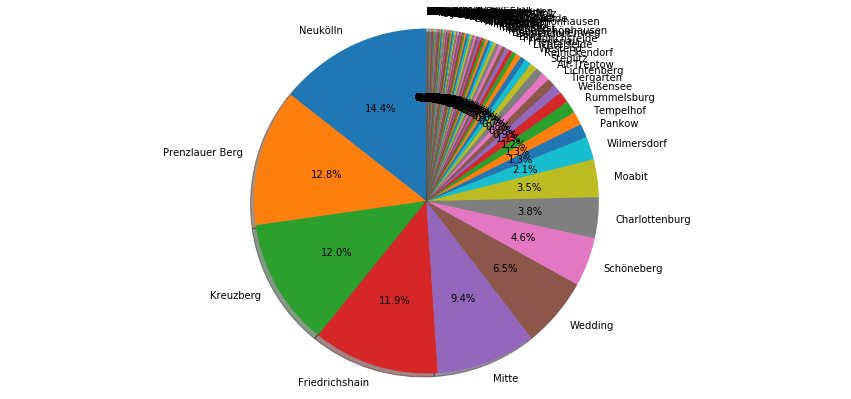

In [434]:
#1. Какого типа переменные участвуют в визуализации: числовые переменные+текстовые
#2. Какова её цель: показать районы с наибольшим предложением по аренде жилья в Берлине
#3. Почему выбрали именно такой тип графика: удобно смотреть доли



from pylab import rcParams
rcParams['figure.figsize']=15,7

#Вывод: наибольшее количество жилья сдается в районе NeuKoeln
#Значений слишком много, поэтому оставляем ТОП-10

sizes=z.id
labels = z.index

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()




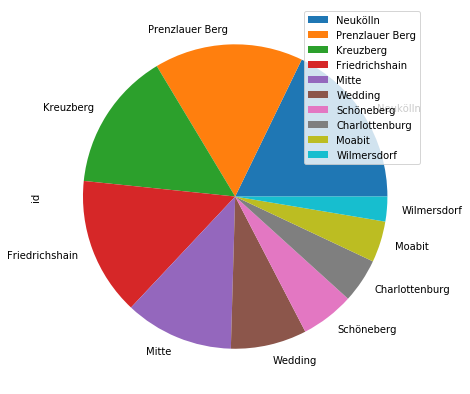

In [430]:
z.filter(['id']).head(10).plot(kind='pie', y='id')

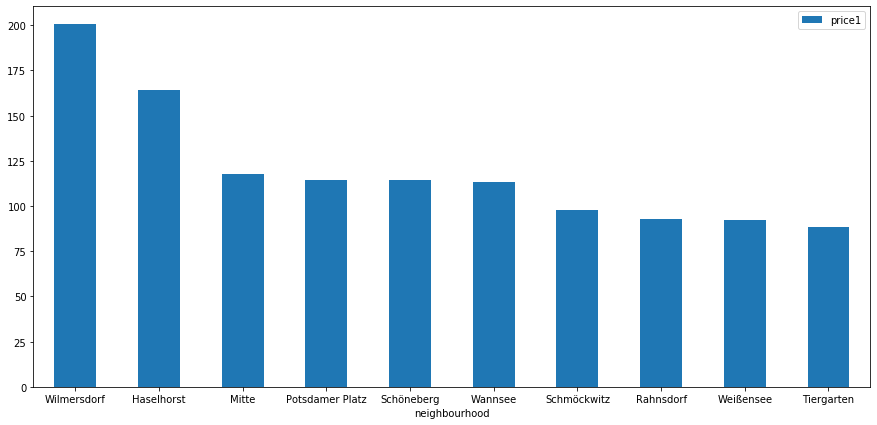

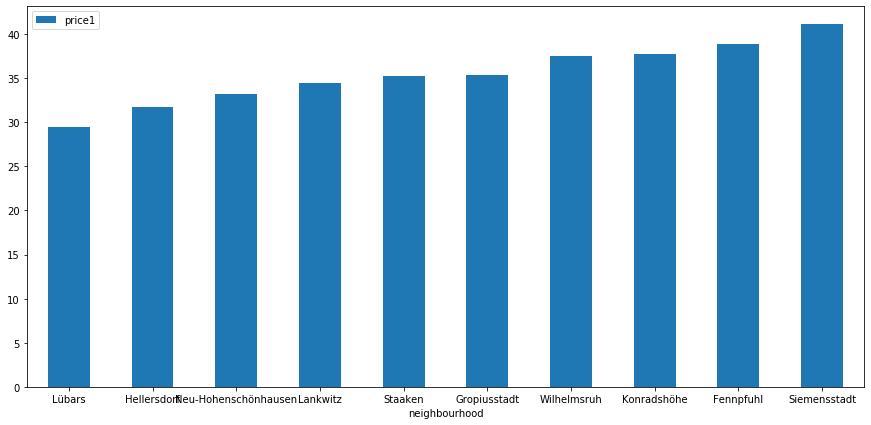

In [411]:
#Самая дорогая аренда - в районе Wilhelmsdorf (200 долл/сутки), самая дешевая - в Luebers (29 долл/сутки)

#1. Какого типа переменные участвуют в визуализации: числовые переменные+текстовые
#2. Какова её цель: показать районы с самой высокой и самой низкой арендной платой
#3. Почему выбрали именно такой тип графика: визуализирует максимум и минимум при выполнении сортировки


z.filter(['price1']).sort_values(by='price1', ascending=False).head(10).plot(kind='bar', rot=360)
z.filter(['price1']).sort_values(by='price1', ascending=True).head(10).plot(kind='bar', rot=360)


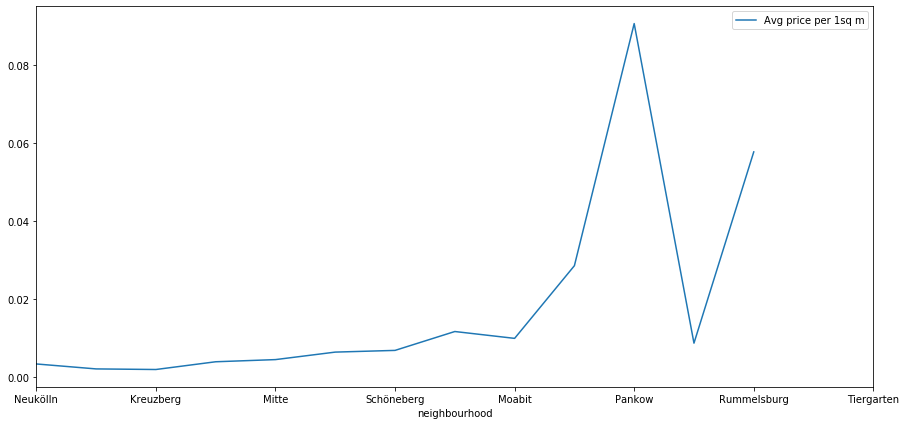

In [616]:
#Средняя цена за кв. метр: видимо, данные по площади помещений не везде заполнены. 
#Выводов сделать нельзя кроме нескольких районов.Из графика - наиболее высокачя стоимость аренды - район Pankow.

#1. Какого типа переменные участвуют в визуализации: числовые переменные+текстовые
#2. Какова её цель: показать районы в разрезе стоимости аренды 1кв м
#3. Почему выбрали именно такой тип графика: данные простые, достаточно построить линейную диаграмму


z.filter(['Avg price per 1sq m']).head(15).plot(kind='line', rot=360)


In [414]:
#Смотрим какие есть варианты для разбивки статистики
airbnb.property_type.unique()


array(['Apartment', 'Loft', 'Condominium', 'House', 'Guest suite',
       'Townhouse', 'Lighthouse', 'Boutique hotel', 'Bed and breakfast',
       'Bungalow', 'Serviced apartment', 'Hostel', 'Other', 'Camper/RV',
       'Guesthouse', 'Houseboat', 'Boat', 'Cottage', 'Tiny house',
       'Cabin', 'Castle', 'Villa', 'Hotel', 'Tipi', 'Resort',
       'Aparthotel', 'Cave', 'Barn', 'Pension (South Korea)',
       'Casa particular (Cuba)', 'Treehouse', 'Earth house'], dtype=object)

In [415]:
#Какие есть типы комнат?
airbnb.room_type.unique()

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

In [536]:
#Считаем стоимость аренды в заивисмости от типа комнаты. Выбиваются значения по типу Hotel room
z_room_type=airbnb.groupby(['room_type']).agg({'price1': 'mean'})
z_room_type


,price1
room_type,
Entire home/apt,85.973912
Hotel room,770.037288
Private room,41.886794
Shared room,34.214286


In [443]:
import seaborn as sns

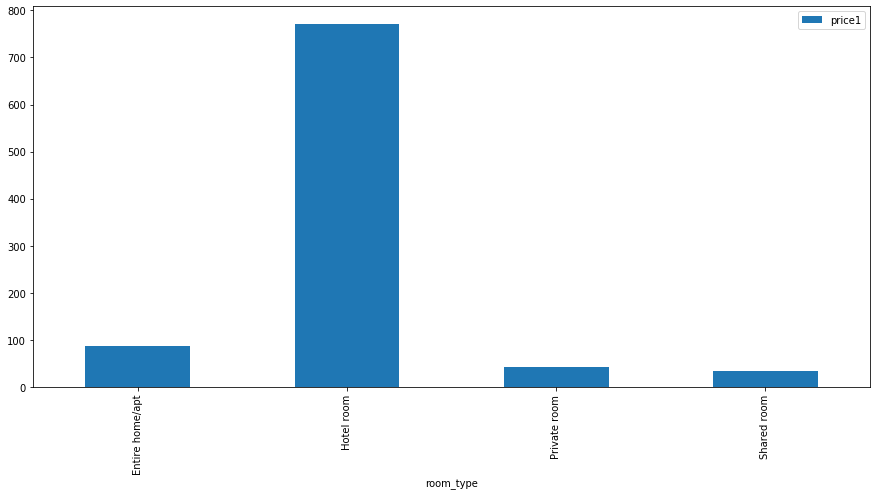

In [613]:
#Делаем график по стоимости аренды по типу комнаты
#самое дорогое жилье - Hotel room


#1. Какого типа переменные участвуют в визуализации: числовые переменные+текстовые
#2. Какова её цель: показать разбивку по стоимости жилья по типу комнаты
#3. Почему выбрали именно такой тип графика: можно было бы использовать линейную диаграмму или гистограмму также. 
#Главное здесь - показать существенную разницу между разными видами комнат, поэтому, например, нельзя было использовать pie-chart

z_room_type.plot(kind='bar')

In [601]:
#Смотрим статистику сколько стоит аренда в сутки - в зависимости от района города
#Убираем типы жилья Гостиница, Вилла и Бутик-Отель, т.к. они искажают статистику (по ним очень высокие цены, до 4000 долл/сутки)
z_property_type=airbnb.groupby(['property_type', 'neighbourhood']).agg({'price1': 'mean'})
z_property_type=z_property_type.loc[(z_property_type.index.get_level_values(0).isin(['Apartment', 'Loft', 'Condominium', 'House', 'Guest suite',
       'Townhouse', 'Lighthouse', 'Bed and breakfast',
       'Bungalow', 'Serviced apartment', 'Hostel', 'Other', 'Camper/RV',
       'Guesthouse', 'Houseboat', 'Boat', 'Cottage', 'Tiny house',
       'Cabin', 'Castle', 'Tipi', 'Resort',
       'Aparthotel', 'Cave', 'Barn', 'Pension (South Korea)',
       'Casa particular (Cuba)', 'Treehouse', 'Earth house']))]
z_property_type.unstack()


price1                                   \
neighbourhood            Adlershof Alt-Hohenschönhausen Alt-Treptow   
property_type                                                         
Aparthotel                     NaN                  NaN         NaN   
Apartment                38.586207            65.514286   57.850575   
Barn                           NaN                  NaN         NaN   
Bed and breakfast              NaN                  NaN         NaN   
Boat                           NaN                  NaN         NaN   
Bungalow                 50.000000                  NaN         NaN   
Cabin                          NaN                  NaN         NaN   
Camper/RV                      NaN                  NaN         NaN   
Casa particular (Cuba)         NaN                  NaN         NaN   
Castle                         NaN                  NaN         NaN   
Cave                           NaN                  NaN         NaN   
Condominium                    NaN            57.666667   81.250000   
Cottage                        NaN                  NaN         NaN   
Earth house                    NaN                  NaN         NaN   
Guest suite                    NaN                  NaN   90.000000   
Guesthouse               35.000000            50.000000         NaN   
Hostel                         NaN                  NaN         NaN   
House                    58.500000            85.777778   84.666667   
Houseboat                      NaN                  NaN         NaN   
Lighthouse                     NaN                  NaN         NaN   
Loft                           NaN            99.000000   71.500000   
Other                          NaN                  NaN         NaN   
Pension (South Korea)          NaN                  NaN         NaN   
Resort                         NaN                  NaN         NaN   
Serviced apartment       50.000000            37.000000         NaN   
Tiny house                     NaN                  NaN         NaN   
Tipi                           NaN                  NaN         NaN   
Townhouse               139.000000            60.000000   30.000000   
Treehouse                      NaN                  NaN         NaN   

                                                                           \
neighbourhood          Altglienicke Baumschulenweg   Biesdorf Blankenburg   
property_type                                                               
Aparthotel                      NaN            NaN        NaN         NaN   
Apartment                 41.000000      37.870130  40.142857        30.0   
Barn                            NaN            NaN        NaN         NaN   
Bed and breakfast               NaN            NaN        NaN         NaN   
Boat                            NaN            NaN        NaN         NaN   
Bungalow                        NaN            NaN  50.000000         NaN   
Cabin                           NaN            NaN        NaN         NaN   
Camper/RV                       NaN            NaN  50.000000         NaN   
Casa particular (Cuba)          NaN            NaN        NaN         NaN   
Castle                          NaN            NaN        NaN         NaN   
Cave                            NaN            NaN        NaN         NaN   
Condominium               70.000000      22.500000        NaN        70.0   
Cottage                         NaN            NaN        NaN         NaN   
Earth house                     NaN            NaN        NaN         NaN   
Guest suite                     NaN      40.000000        NaN         NaN   
Guesthouse                47.500000            NaN  47.500000         NaN   
Hostel                          NaN            NaN        NaN         NaN   
House                     47.909091     163.333333  58.400000        40.0   
Houseboat                       NaN            NaN        NaN         NaN   
Lighthouse                      NaN            NaN        NaN

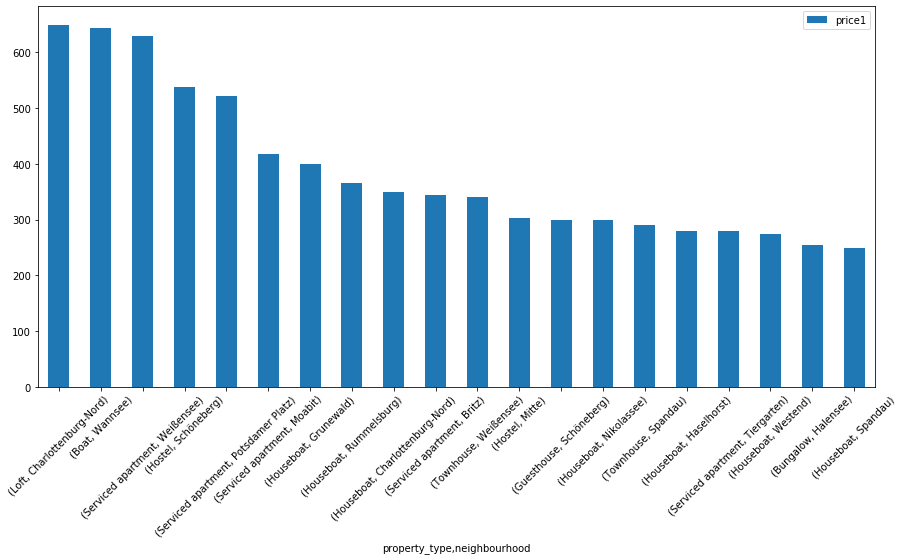

In [609]:
#Делаем статистику по привязке тип комнаты/район. Cамое дорогое жилье  - лофт и лодка.

#1. Какого типа переменные участвуют в визуализации: числовые переменные+текстовые
#2. Какова её цель: показать не только самый дорогой район по аренде, но и самый дорогой тип жилья в нем
#3. Почему выбрали именно такой тип графика: можно видеть максимум и далее значения по убыванию


z_property_type.sort_values(by='price1', ascending=False).head(20).plot(kind='bar', rot=45)

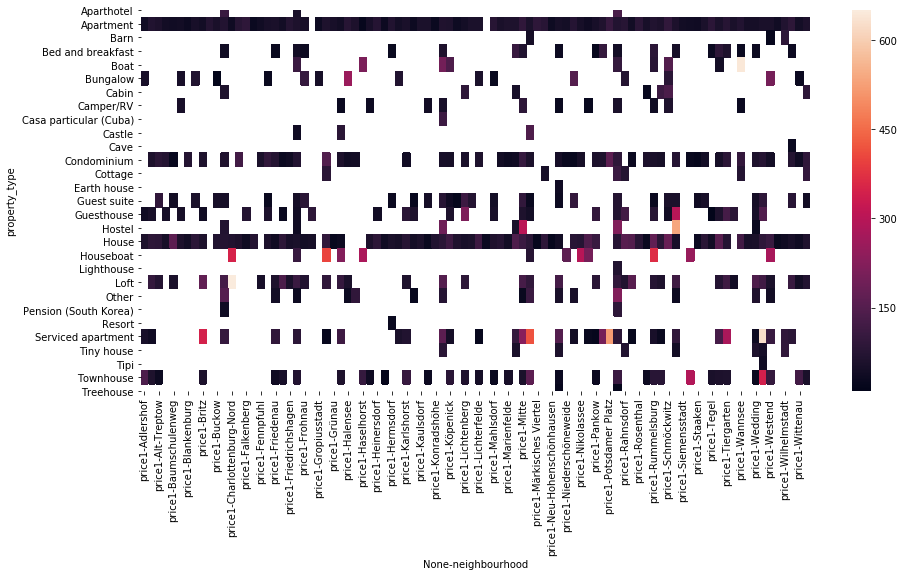

In [605]:
#делаем heat-map по цене типа жилья по районам. 
#Опять видно, что тип лодка - в топе по цене, также дом-лодка и serviced apartment.

#1. Какого типа переменные участвуют в визуализации: числовые переменные+текстовые
#2. Какова её цель: визуализация тип жилья vs район vs цена
#3. Почему выбрали именно такой тип графика: можно многвенно сделать выводы по ценам/районам/типам жилья


ax=sns.heatmap(z_property_type.unstack())

In [606]:
#Смотрим в каком районе самые большие сдаваемые площади.

#1. Какого типа переменные участвуют в визуализации: числовые переменные+текстовые
#2. Какова её цель: показать районы с максимальной площадью, сдаваемой в аренду
#3. Почему выбрали именно такой тип графика: для того, чтобы была таблица со значениями 
#+ визуализация динамики по убыванию размера площади

biggest_apartments_z=z.groupby('neighbourhood')[['Avg square_feet','price1']].sum()\
.sort_values('Avg square_feet', ascending=False).head(30)

biggest_apartments_z.style.bar()

,Avg square_feet,price1
neighbourhood,,
Schmöckwitz,186.095,97.9524
Konradshöhe,121,37.75
Lichtenrade,91.6667,56.963
Rosenthal,83.6667,81.1111
Buckow,48.45,51.75
Hansaviertel,33.76,58.5
Zehlendorf,26.977,60.7241
Halensee,25.2143,76.3143
Tempelhof,23.276,61.5714


In [176]:
import seaborn as sns


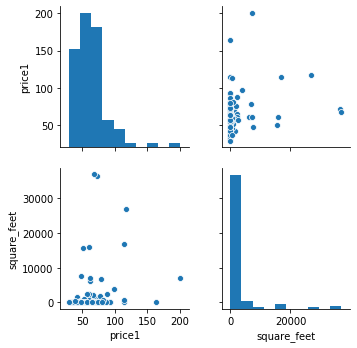

In [610]:
#Смотрим, есть ли зависимость между площадью квартиры и ценой аренды.
#Не всегда есть, например, при цене <100 долл есть очень большие площади аренды.
#Но есть подозрение, что поля с площадью жилья заполнены неверно


#1. Какого типа переменные участвуют в визуализации: только числовые
#2. Какова её цель: показать зависимость площади арендуемого жилья от стоимости аренды
#3. Почему выбрали именно такой тип графика: показывает распределение пары 'стоимость аренды/площадь'

sns_plot=sns.pairplot(z[['price1', 'square_feet']])
sns_plot

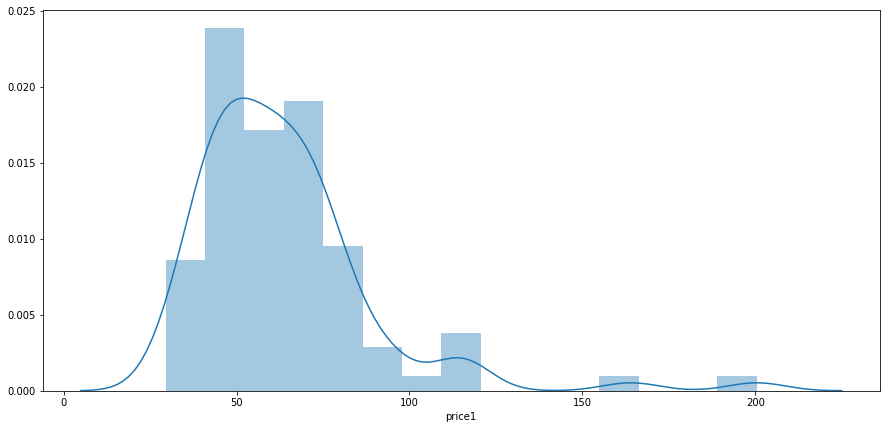

In [561]:
#наибольшее количество жилья сдается по цене 40-50 долларов

#1. Какого типа переменные участвуют в визуализации:только числовые
#2. Какова её цель: показать наиболее популярнгую цену аренды в Берлине
#3. Почему выбрали именно такой тип графика: показывает количество предложений по аренде в зависимости от цены


sns.distplot(z.price1)

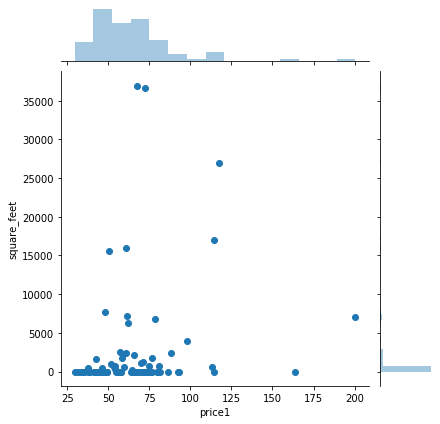

In [608]:
#нет прямой зависимоти цены от площади жилья. Или это выбросы.

#1. Какого типа переменные участвуют в визуализации: только числовые 
#2. Какова её цель: показать зависимость площади арендуемого жилья от стоимости аренды
#3. Почему выбрали именно такой тип графика: показывает распределение пары 'стоимость аренды/площадь'
sns.jointplot(x='price1',y='square_feet',data=z,kind='scatter')